<a href="https://colab.research.google.com/github/rafaxy/tarefas_AI/blob/main/Tarefa_1_labirinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importações
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#lendo a imagem do labirinto
img = cv2.imread('maze2.png',0)

In [ ]:
img.shape

(186, 261)

In [ ]:
scale_percent = 60 # percentual do tamanho original
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

In [ ]:
# imagem redimensionada
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
ret, binary_img = cv2.threshold(resized, 160, 255, cv2.THRESH_BINARY)
#aumentei o threshold de 127 para 160, senão ele abre caminho onde não tem

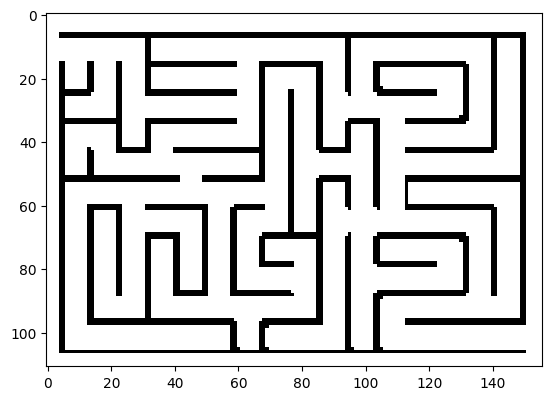

In [ ]:
plt.imshow(binary_img,'gray',vmin=0,vmax=255)

In [ ]:
rows, cols = binary_img.shape
print(rows,cols)

111 156


In [ ]:
def walls(binary_img,rows=rows,cols=cols, row_check = False): 
  # this routine return cols or rows position of walls in a list: 
  #    if you add row_check = True it return rows and otherwise cols
  list_max, list_min = [], []
  for i in range(rows):
    for j in range(cols):
      m =binary_img[i,j]
      if m == 0:
        if row_check == False:
          if j > cols/2:
            list_max.append(j)
          else:
            list_min.append(j)
        else:
          if i > rows/2:
            list_max.append(i)
          else:
            list_min.append(i)
  return list_max, list_min
     

In [ ]:
def freq(list_):
  # this routine return the frequency a item appears in a list as a dict
  frequency = {}
  for item in list_:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1
  return frequency

In [ ]:
# key_max is the most frequent wall position using col_max, row_max, row_min and col_min
# key_max for col_max it represent right
# key_max for col_min represents left
# key_max for row_max represent bottom
# key_max for row_min represent top

col_max, col_min = walls(binary_img)
row_max, row_min = walls(binary_img,row_check=True)
freq_row1, freq_row2 = freq(row_min), freq(row_max)
freq_col1, freq_col2 = freq(col_min), freq(col_max)
list_all = [freq_col1,freq_col2,freq_row1,freq_row2]
labels = ['col min','col max','row min','row max']
k = 0
pos_ =[]
for list_ in list_all:
  key_max = max(list_, key=list_.get)
  print(key_max, list_[key_max], labels[k]) 
  pos_.append(key_max)
  k += 1

4 94 col min
149 93 col max
6 147 row min
106 147 row max


In [ ]:
id_min = [pos_[2], pos_[0]]
id_max = [pos_[3],pos_[1]]
id_min,id_max

([6, 4], [106, 149])

In [ ]:
nref = 7
def find(img, id_min,id_max,rows=rows, cols=cols,N =nref):
  
  positions =[]
  score = []

  for j in [id_min[1], id_max[1]]:
    max_sum = 0
    for i in range(rows-N):
      total = 0
      if i > id_min[0] and i < id_max[0]:
        for k in range(N):
          total += img[i+k,j]
          if max_sum < total:
            idx, idy = i, j
            max_sum = total
    if max_sum > 0:
      positions.append([idx,idy])
      score.append(max_sum)

  for i in [id_min[0],id_max[0]]:
    max_sum = 0
    for j in range(cols-N):
      total = 0
      if j > id_min[1] and j < id_max[1]:
        for k in range(N):
          total += img[i,j+k]
          if max_sum < total:
            idx, idy = i, j
            max_sum = total
    if max_sum > 0:
      positions.append([idx,idy])
      score.append(max_sum)
  k = 0
  x =np.array(score)
  ind = np.argsort(x)
  pos  = [positions[ind[-1]],positions[ind[-2]]]
  sco  = [score[ind[-1]],score[ind[-2]]]

  return pos, sco

In [ ]:
find(binary_img,id_min,id_max)

([[98, 149], [8, 4]], [1785, 1785])

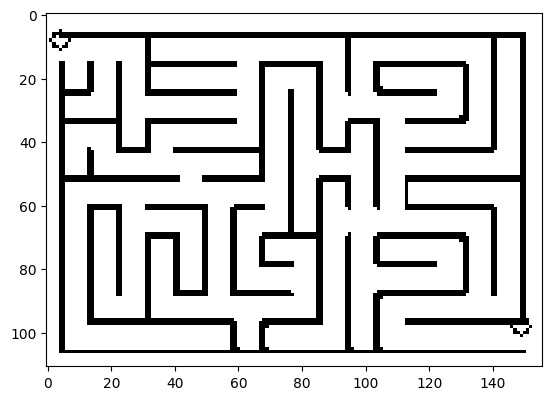

In [ ]:
positions,score =find(binary_img,id_min,id_max)
yc,xc = positions[0]
image = cv2.circle(binary_img, (xc,yc), radius=3, color=[0,0,255], thickness=1)
yc,xc = positions[1]
image = cv2.circle(image, (xc,yc), radius=3, color=[0,0,255], thickness=1)
plt.imshow(image,'gray',vmin=0,vmax=255)

In [ ]:
find(binary_img,id_min,id_max)

([[98, 149], [8, 4]], [1530, 1530])

In [ ]:
target, score = find(binary_img,id_min,id_max)
start_ = target[1]
end_ = target[0]
start_, end_

([8, 4], [98, 149])

In [ ]:
grid = []
# number one for wall and zero for empty
for x in binary_img:
  grid.append(list(x))

for i in range(rows):
  for j in range(cols):
    if grid[i][j]== 0:
      grid[i][j]=1 # 1 if it is wall

for i in range(rows):
  for j in range(cols):
    if grid[i][j]== 255:
      grid[i][j]=0 # 0  if it is empty


for i in range(rows):
  for j in range(cols):
    if i < id_min[0] or i > id_max[0]:
      grid[i][j] = 1

for i in range(rows):
  for j in range(cols):
    if j < id_min[1] or j > id_max[1]:
      grid[i][j] = 1

start = start_[0],start_[1]
end = end_[0], end_[1]

In [ ]:
a = grid

In [ ]:
from queue import Queue

def isValid(maze, visited, row, col):
    rows, cols = len(maze), len(maze[0])
    return (row >= 0) and (row < rows) and (col >= 0) and (col < cols) and maze[row][col] == 0 and not visited[row][col]

def BFS(maze, start, end):
    rows, cols = len(maze), len(maze[0])

    # Possible 4 directions
    row_num = [-1, 0, 0, 1]
    col_num = [0, -1, 1, 0]

    visited = [[False for _ in range(cols)] for _ in range(rows)]

    # Queue for BFS, each node: (x, y, dist, path)
    q = Queue()
    q.put((start[0], start[1], 0, []))

    while not q.empty():
        row, col, dist, path = q.get()
        path = path + [(row, col)]

        # If this cell is the destination
        if (row, col) == (end[0], end[1]):
            return path, dist

        # For each valid adjacent cell
        for i in range(4):
            adj_row, adj_col = row + row_num[i], col + col_num[i]

            if isValid(maze, visited, adj_row, adj_col):
                visited[adj_row][adj_col] = True
                q.put((adj_row, adj_col, dist + 1, path))

    return None, float('inf') # Return None and infinity if no path exists

# Example usage:
maze = grid

start = (8,8)
end = (100,144)
path, dist = BFS(maze, start, end)
if path is not None:
    print(f"Path found with distance {dist}: {path}")
else:
    print("No path found.")


Path found with distance 294: [(8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19), (8, 20), (8, 21), (8, 22), (8, 23), (8, 24), (8, 25), (8, 26), (8, 27), (8, 28), (8, 29), (8, 30), (9, 30), (10, 30), (11, 30), (12, 30), (13, 30), (14, 30), (15, 30), (16, 30), (17, 30), (18, 30), (19, 30), (20, 30), (21, 30), (22, 30), (23, 30), (24, 30), (25, 30), (26, 30), (26, 31), (26, 32), (26, 33), (26, 34), (26, 35), (26, 36), (26, 37), (26, 38), (26, 39), (26, 40), (26, 41), (26, 42), (26, 43), (26, 44), (26, 45), (26, 46), (26, 47), (26, 48), (26, 49), (26, 50), (26, 51), (26, 52), (26, 53), (26, 54), (26, 55), (26, 56), (26, 57), (26, 58), (26, 59), (26, 60), (25, 60), (24, 60), (23, 60), (22, 60), (21, 60), (20, 60), (19, 60), (18, 60), (17, 60), (16, 60), (15, 60), (14, 60), (14, 61), (14, 62), (14, 63), (14, 64), (14, 65), (14, 66), (14, 67), (14, 68), (14, 69), (14, 70), (14, 71), (14, 72), (14, 73), (14, 74), (14, 75), (14, 76), (14, 

In [ ]:
start = (8,8)
end = (100,144)
#end = (10,10)
print(start)
print(end)
len(maze)
#maze[8][4] == 0
#print_m(maze)

(8, 8)
(100, 144)


111

In [ ]:
ret, image = cv2.threshold(resized, 160, 255, cv2.THRESH_BINARY)
for xy in path:
  yc,xc = xy[0],xy[1]
  cv2.circle(image, (xc,yc), radius=3, color=[0,0,255], thickness=1)

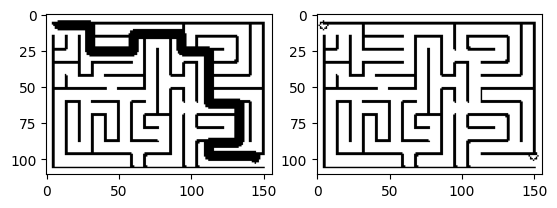

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image,'gray',vmin=0,vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(binary_img,'gray',vmin=0,vmax=255)
plt.show()